In [1]:
#  Create workflow to calulate the bastman strike rate, balls per boundary percentage and boundary percentage using langgraph

# inputs:
# runs
# balls
# boundaries

# outputs:
# strike rate
# balls per boundary percentage
# boundary percentage

In [24]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [25]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    no_of_sixes: int
    no_of_fours: int
    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    summary: str

In [43]:
def calculate_strike_rate(state: BatsmanState) -> dict:
    strike_rate = (state['runs'] / state['balls']) * 100
    return {"strike_rate":strike_rate}

def calculate_balls_per_boundary(state: BatsmanState) -> dict:
    bpb = state['balls'] / (state['no_of_fours'] + state['no_of_sixes'])
    return {"balls_per_boundary":bpb}

def calculate_boundary_percentage(state:BatsmanState) -> dict:
    boundary_percentage = (((state['no_of_fours'] * 4) + (state['no_of_sixes'] * 6))/state['runs'])*100
    return {"boundary_percentage":boundary_percentage}

def summary(state:BatsmanState) -> dict:
    summary = f"""strike_rate --> {state['strike_rate']} \n boundary_precentage--> {state['boundary_percentage']} \n balls_per_boundary--> {state['balls_per_boundary']}"""
    return{"summary":summary}

In [44]:
graph = StateGraph(BatsmanState)
graph.add_node("calculate_strike_rate",calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary",calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percentage",calculate_boundary_percentage)
graph.add_node("summary",summary)

graph.add_edge(START,"calculate_strike_rate")
graph.add_edge(START,"calculate_balls_per_boundary")
graph.add_edge(START,"calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate","summary")
graph.add_edge("calculate_balls_per_boundary","summary")
graph.add_edge("calculate_boundary_percentage","summary")
graph.add_edge("summary",END)

workflow = graph.compile()


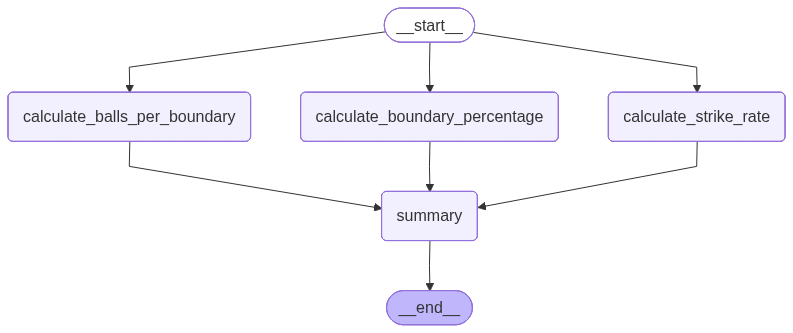

In [45]:
workflow

In [46]:
initial_state = {"runs":100,"balls":50,"no_of_sixes":6,"no_of_fours":4}
output_state = workflow.invoke(initial_state)
print(output_state)

{'runs': 100, 'balls': 50, 'no_of_sixes': 6, 'no_of_fours': 4, 'strike_rate': 200.0, 'balls_per_boundary': 5.0, 'boundary_percentage': 52.0, 'summary': 'strike_rate --> 200.0 \n boundary_precentage--> 52.0 \n balls_per_boundary--> 5.0'}
